In [4]:
from src.environments.market import Market

m = Market("2013-02-12", "2013-02-14", 3)
a = m.reset()
print(a[1,:,1:])

[[6.84014000e+01 6.68928000e+01 6.78542000e+01 1.58168416e+08]
 [6.92771000e+01 6.76071000e+01 6.85614000e+01 1.29029425e+08]
 [6.89114000e+01 6.68205000e+01 6.68428000e+01 1.51829363e+08]]


In [35]:
a,b,c = m.step()
print(a[1,:,:], b[1,:,:], c, sep='\n')
print(m.next_step, m.step_to_date())

[[6.77142000e+01 6.84014000e+01 6.68928000e+01 6.78542000e+01
  1.58168416e+08]
 [6.80714000e+01 6.92771000e+01 6.76071000e+01 6.85614000e+01
  1.29029425e+08]
 [6.85014000e+01 6.89114000e+01 6.68205000e+01 6.68428000e+01
  1.51829363e+08]]
[[6.80714000e+01 6.92771000e+01 6.76071000e+01 6.85614000e+01
  1.29029425e+08]
 [6.85014000e+01 6.89114000e+01 6.68205000e+01 6.68428000e+01
  1.51829363e+08]
 [6.67442000e+01 6.76628000e+01 6.61742000e+01 6.67156000e+01
  1.18721995e+08]]
False
1 2013-02-12


(17, 755, 5)


<Figure size 432x288 with 0 Axes>

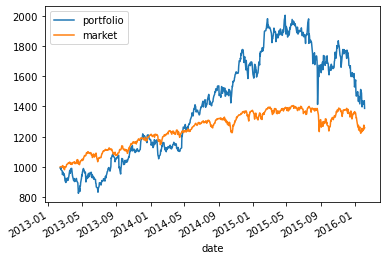

In [3]:
from src.environments.portfolio import Portfolio
import numpy as np

p = Portfolio("2013-02-12", "2016-02-05", 3, continuous=False)
print(p.market.data.shape)

p.reset()
while True:
    #action = np.random.rand(17)
    #action = action / action.sum()
    action = np.zeros(17)
    action[1] = 1
    a,b,c,d = p.step(action)
    if c:
        break

p.render()

(17, 755, 5)


<Figure size 432x288 with 0 Axes>

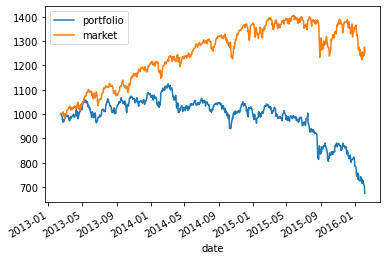

In [4]:
from src.environments.portfolio_end import PortfolioEnd
import numpy as np

p = PortfolioEnd("2013-02-13", "2016-02-05", 4, continuous=False)
print(p.market.data.shape)

p.reset()
while True:
    action = np.random.rand(17)
    action = action / action.sum()
    #action = np.zeros(17)
    #action[1] = 1
    a,b,c,d = p.step(action)
    if c:
        break

p.render()

In [12]:
import numpy as np
np.maximum(1, np.array([0,1,2,3]))

array([1, 1, 2, 3])

In [10]:
from src.environments.portfolio_end import PortfolioEnd
import numpy as np
from src.ddpg.actor import Actor
from src.ddpg.critic import Critic
import torch

p = PortfolioEnd("2013-02-13", "2016-02-05", 4, continuous=False)
a1,a2 = p.reset()
#a1 = np.transpose(a1, (2,0,1))
a1 = torch.from_numpy(a1)
a2 = torch.from_numpy(a2)

#a1 = torch.stack((a1,a1))
#a2 = torch.stack((a2,a2))

actor = Actor(3, 4)
actor.double()
out = actor(a1, a2)

action = np.zeros(17)
action[1] = 1
action = torch.from_numpy(action)

#action = torch.stack((action, action))

critic = Critic(3, 17, 4)
critic.double()
out2 = critic(a1, a2, action)

In [13]:
out

tensor([0.0854, 0.0446, 0.0807, 0.0772, 0.0324, 0.0752, 0.0629, 0.0792, 0.0511,
        0.0695, 0.0018, 0.0618, 0.0542, 0.0764, 0.0608, 0.0163, 0.0704],
       dtype=torch.float64, grad_fn=<SoftmaxBackward0>)

In [18]:
aa = [(1,2,3), (4,5,6)]
for a in aa:
    print(*a, 0)

1 2 3 0
4 5 6 0


(750.0, 2000.0)

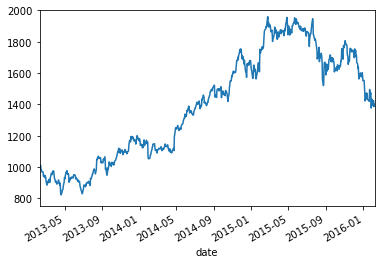

In [4]:
import pandas as pd

a = pd.read_csv('data/AAPL_data.csv')
a['date'] = pd.to_datetime(a['date'], format='%Y-%m-%d')
a.set_index('date', inplace=True)
a['close'] = a['close'].apply(lambda x : x / a.iloc[0]['close'] * 1000)
ax = a['close'].plot()
ax.set_xlim(pd.Timestamp('2013-02-08'), pd.Timestamp('2016-02-07'))
ax.set_ylim(750, 2000)

In [1]:
from src.environments.portfolio import Portfolio

p = Portfolio("2013-02-12", "2016-02-05", 3, continuous=False)

obs = p.reset()
print(obs[1,2,3])
obs[1,2,3] = 1
print(p.market.data[1,2,3])

[*********************100%***********************]  1 of 1 completed
66.8428
66.8428


In [1]:
from src.environments.portfolio_end import PortfolioEnd

p = PortfolioEnd("2013-02-12", "2016-02-05", 3, continuous=False)
p.observation_space

[*********************100%***********************]  1 of 1 completed


Box(-inf, inf, (16, 3, 3), float32)

In [7]:
import torch
a = torch.rand(2)
a.reshape((2,1)).shape

torch.Size([2, 1])